# Time comparsion dataframe vs numpy

In [24]:
!pip install seaborn

#from seaborn import sns

In [25]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from timeit import timeit
import pandas as pd
import sys
sns.set(style="darkgrid")

In [26]:
!pip install hurry.filesize
from hurry.filesize import size

In [27]:

%%time
 
data = pd.read_csv('data\household_power_consumption.txt', sep=";", header=0)
print(f"data {len(data)}")
clean_data = data.dropna()
clean_list = ['Global_reactive_power',"Voltage","Global_active_power","Global_reactive_power","Voltage","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3"]
clean_data[clean_list] = clean_data[clean_list].astype("float32")
print(f"clean_data {len(clean_data)}")

dtype=[("Date","U10"),("Time","U8"),('Active',"f4"),('Reactive',"f4"),('Voltage',"f4"),('Intensity',"f4"),('Sub_1',"i4"),('Sub_2',"i4"),('Sub_3',"i4")]
ndata = np.genfromtxt("data/household_power_consumption.txt", delimiter=';', usecols=range(0, 9),dtype=dtype, skip_header=True,missing_values=['?'])


data 2075259
clean_data 2049280
Wall time: 31.3 s


In [28]:
from hurry.filesize import size
print(f"Pandas: {size(sys.getsizeof(clean_data))} \n Numpy: {size(sys.getsizeof(ndata))}")


Pandas: 326M 
 Numpy: 96B


In [29]:

clean_data[:10]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.839996,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630005,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.289993,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740005,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.679993,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020004,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.089996,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220001,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990005,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860001,15.8,0.0,2.0,16.0


In [30]:
ndata[:10]

array([('16/12/2006', '17:24:00', 4.216, 0.418, 234.84, 18.4, 0, 1, 17),
       ('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0, 1, 16),
       ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0, 2, 17),
       ('16/12/2006', '17:27:00', 5.388, 0.502, 233.74, 23. , 0, 1, 17),
       ('16/12/2006', '17:28:00', 3.666, 0.528, 235.68, 15.8, 0, 1, 17),
       ('16/12/2006', '17:29:00', 3.52 , 0.522, 235.02, 15. , 0, 2, 17),
       ('16/12/2006', '17:30:00', 3.702, 0.52 , 235.09, 15.8, 0, 1, 17),
       ('16/12/2006', '17:31:00', 3.7  , 0.52 , 235.22, 15.8, 0, 1, 17),
       ('16/12/2006', '17:32:00', 3.668, 0.51 , 233.99, 15.8, 0, 1, 17),
       ('16/12/2006', '17:33:00', 3.662, 0.51 , 233.86, 15.8, 0, 2, 16)],
      dtype=[('Date', '<U10'), ('Time', '<U8'), ('Active', '<f4'), ('Reactive', '<f4'), ('Voltage', '<f4'), ('Intensity', '<f4'), ('Sub_1', '<i4'), ('Sub_2', '<i4'), ('Sub_3', '<i4')])

In [31]:

def to_plot(s, t1, t2, name):
    sns.set(font_scale=1.5)
    font = {'weight' : 'bold',
            'size'   : 10}
    plt.rc('font', **font)
    plt.plot (s, t1)
    plt.plot(s, t2)
    plt.yscale('log')
    plt.xticks(rotation=30)  
    plt.title(name)
    plt.legend(['pandas','numpy'])
    plt.ylabel('time(s)')
    plt.xlabel('rows')
    return plt.show()

## Task 1

Select all rows where Global_active_power > 5 kW

In [46]:

clean_data[:12]


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.839996,18.400000,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630005,23.000000,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.289993,23.000000,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740005,23.000000,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.679993,15.800000,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020004,15.000000,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.089996,15.800000,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220001,15.800000,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990005,15.800000,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860001,15.800000,0.0,2.0,16.0


In [47]:
ndata[:12]

array([('16/12/2006', '17:24:00', 4.216, 0.418, 234.84, 18.4, 0, 1, 17),
       ('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0, 1, 16),
       ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0, 2, 17),
       ('16/12/2006', '17:27:00', 5.388, 0.502, 233.74, 23. , 0, 1, 17),
       ('16/12/2006', '17:28:00', 3.666, 0.528, 235.68, 15.8, 0, 1, 17),
       ('16/12/2006', '17:29:00', 3.52 , 0.522, 235.02, 15. , 0, 2, 17),
       ('16/12/2006', '17:30:00', 3.702, 0.52 , 235.09, 15.8, 0, 1, 17),
       ('16/12/2006', '17:31:00', 3.7  , 0.52 , 235.22, 15.8, 0, 1, 17),
       ('16/12/2006', '17:32:00', 3.668, 0.51 , 233.99, 15.8, 0, 1, 17),
       ('16/12/2006', '17:33:00', 3.662, 0.51 , 233.86, 15.8, 0, 2, 16),
       ('16/12/2006', '17:34:00', 4.448, 0.498, 232.86, 19.6, 0, 1, 17),
       ('16/12/2006', '17:35:00', 5.412, 0.47 , 232.78, 23.2, 0, 1, 17)],
      dtype=[('Date', '<U10'), ('Time', '<U8'), ('Active', '<f4'), ('Reactive', '<f4'), ('Voltage', '<f4'), ('Intensity', '

In [33]:
size = [10**i for i in range(1,7)]
ticks = [str(s) for s in size]

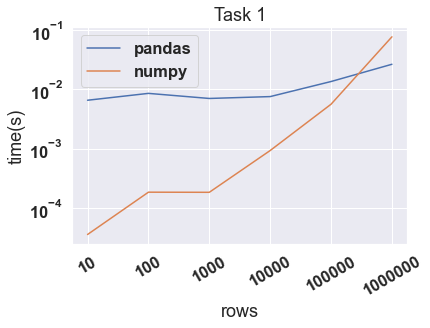

In [34]:


time1 = []
time2 = []
for s in size:
    d=clean_data[:s]
    n=ndata[:s]
    time1.append(timeit("d[d.Global_active_power>5]",number=10, globals=globals()))
    time2.append(timeit('n[n["Active"]>5]',number=10, globals=globals()))

to_plot(ticks,time1,time2,"Task 1")
#clean_data[clean_data.Global_active_power>5]

## Task 2

Select all rows where Voltage > 235 V

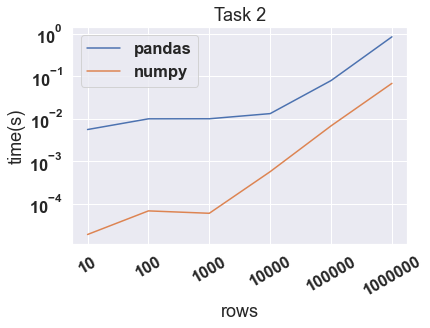

In [37]:
time1 = []
time2 = []
for s in size:
    d=clean_data[:s]
    n=ndata[:s]
    time1.append(timeit("d[d.Voltage>235]",number=10, globals=globals()))
    time2.append(timeit('n["Voltage"]>235',number=10, globals=globals()))

to_plot(ticks,time1,time2,"Task 2")

## Task 3
Select all where Sub_metering_2 > Sub_metering_3 in range [19,20] of Global_intensity

*Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер. *

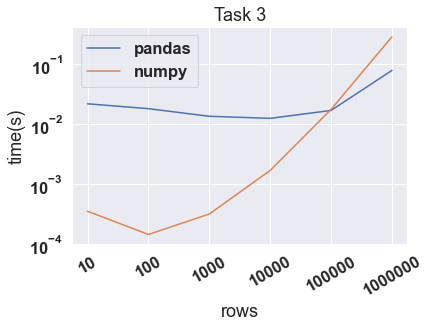

In [45]:
time1 = []
time2 = []
for s in size:
    d=clean_data[:s]
    n=ndata[:s]
    time1.append(timeit("pandas_n3=d[(d.Global_intensity>=19)&(d.Global_intensity<=20)]; pandas_n3            [pandas_n3.Sub_metering_2>pandas_n3.Sub_metering_3]",number=10, globals=globals()))
    time2.append(timeit('n[np.logical_and.reduce([ n["Intensity"] >= 19, n["Intensity"] <= 20, n["Sub_2"] > n["Sub_3"] ])]',number=10, globals=globals()))

to_plot(ticks,time1,time2,"Task 3")

